In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
df['distance_type'] = pd.cut(df['distance'],bins=[0,5,10,15,25],
                             right=False,labels=['short','medium','long','very_long'])

In [ ]:
from sklearn import set_config
set_config(transform_output = 'pandas')

In [ ]:
df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,City_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time,order_hour,order_period,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,Sunny,high,...,INDO,Saturday,3,19,1,15.0,11.0,Morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,Stormy,jam,...,BANG,Friday,3,25,0,5.0,19.0,Evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,Sandstorms,low,...,BANG,Saturday,3,19,1,15.0,8.0,Morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,Sunny,medium,...,COIMB,Tuesday,4,5,0,10.0,18.0,Evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,Cloudy,high,...,CHEN,Saturday,3,26,1,15.0,13.0,Afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,high,...,JAP,Thursday,3,24,0,10.0,11.0,Morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,jam,...,AGR,Wednesday,2,16,0,15.0,19.0,Evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,low,...,CHEN,Friday,3,11,0,15.0,23.0,Night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,high,...,COIMB,Monday,3,7,0,5.0,13.0,Afternoon,6.232393,medium


In [ ]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'City_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time', 'order_hour',
       'order_period', 'distance', 'distance_type'],
      dtype='object')

In [ ]:
columns_to_rename = ['City_name','order_day','order_day_of_week','order_hour','order_period']

In [1]:
df.rename(columns={
    'City_name':'city_name',
    'order_hour':'order_time_hour',
    'order_period':'order_time_of_day',


},inplace=True)

NameError: name 'df' is not defined

In [ ]:
# drop columns not required for model buliding
columns_to_drop = ['rider_id',
                   'restaurant_latitude',
                   'restaurant_longitude',
                   'delivery_latitude',
                   'delivery_longitude',
                   'order_date',
                   'order_time_hour',
                   'order_day_of_week']
df.drop(columns=columns_to_drop,inplace=True)

In [ ]:
df.shape

(45502, 19)

In [ ]:
df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: >

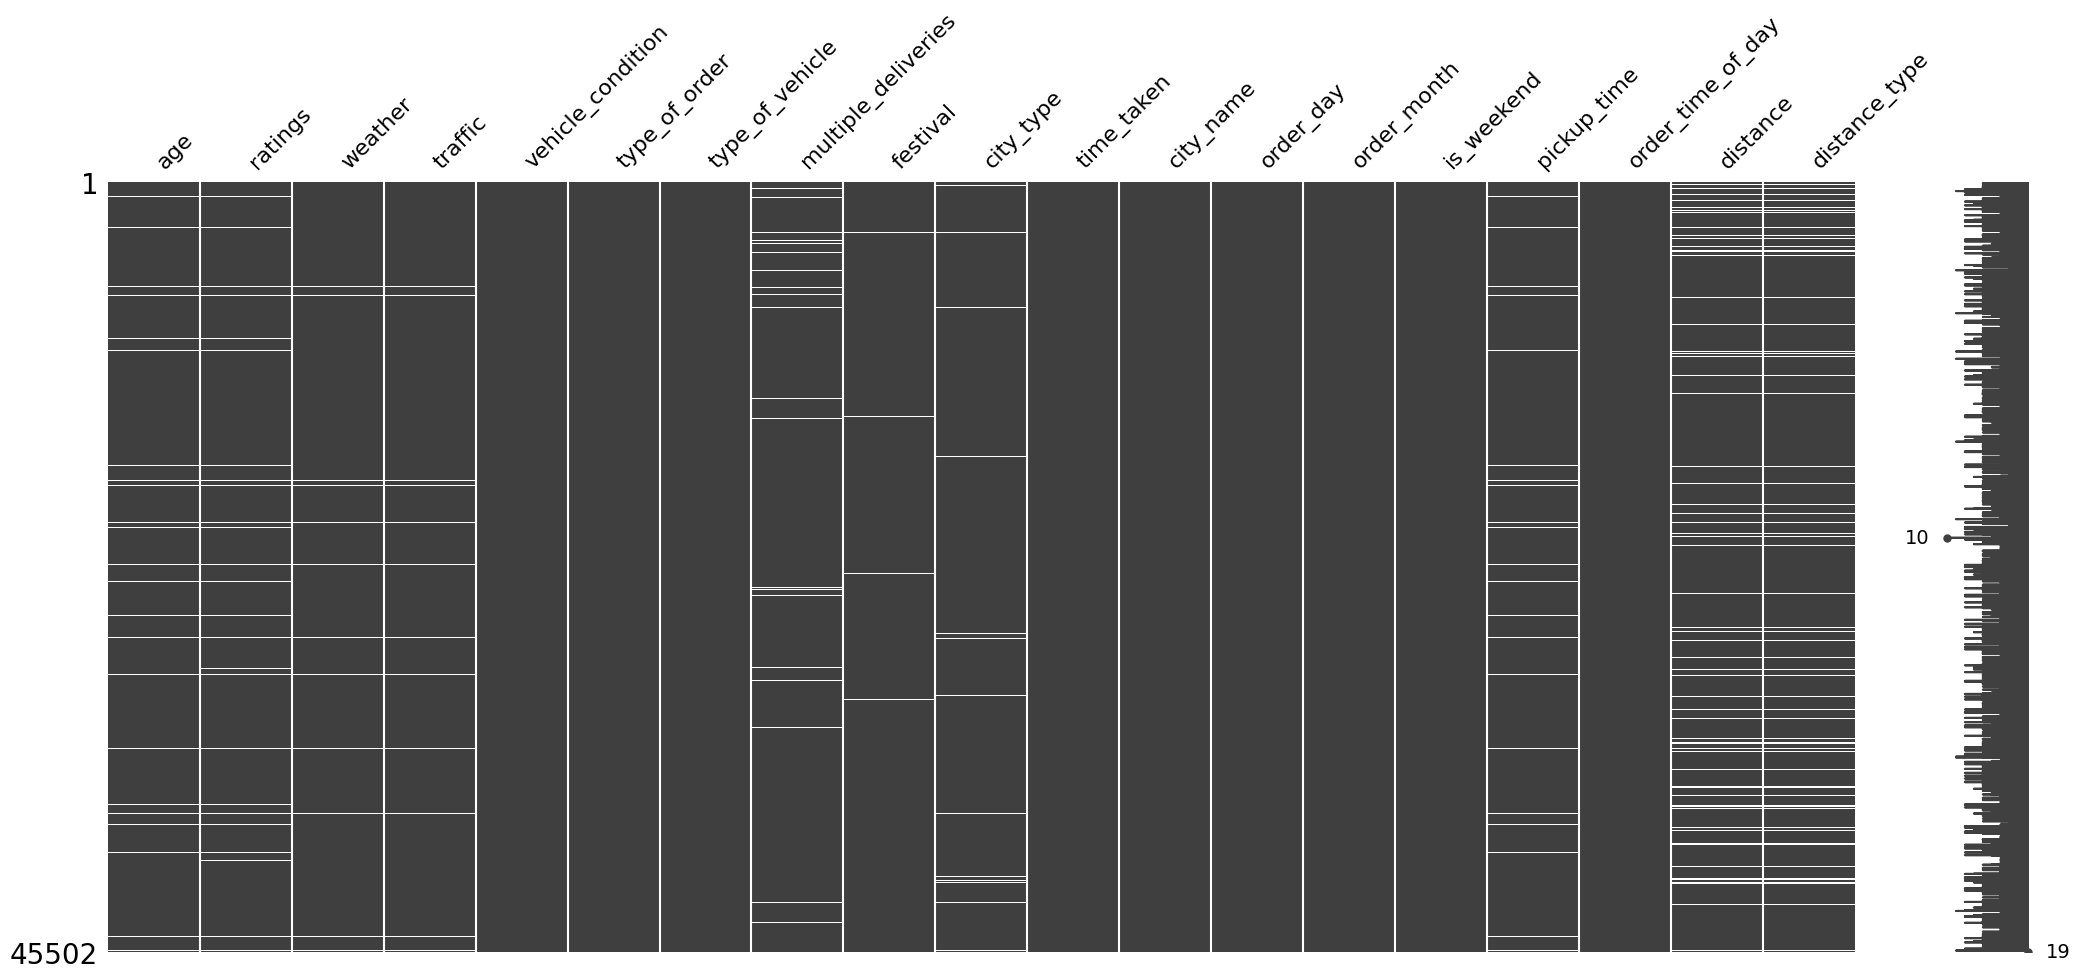

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
missing_cols = (
    df
    .isna()
    .any(axis=0)
    .loc[lambda x:x]
    .index
)
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time', 'distance', 'distance_type'],
      dtype='object')

Data Prep

In [ ]:
temp_df = df.copy().dropna()
temp_df.shape

(37918, 19)

In [ ]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']
X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_day,order_month,is_weekend,pickup_time,order_time_of_day,distance,distance_type
0,37.0,4.9,Sunny,high,2,snack,motorcycle,0.0,No,urban,INDO,Saturday,3,1,15.0,Morning,3.025149,short
1,34.0,4.5,Stormy,jam,2,snack,scooter,1.0,No,metropolitian,BANG,Friday,3,0,5.0,Evening,20.183530,very_long
2,23.0,4.4,Sandstorms,low,0,drinks,motorcycle,1.0,No,urban,BANG,Saturday,3,1,15.0,Morning,1.552758,short
3,38.0,4.7,Sunny,medium,0,buffet,motorcycle,1.0,No,metropolitian,COIMB,Tuesday,4,0,10.0,Evening,7.790401,medium
4,32.0,4.6,Cloudy,high,1,snack,scooter,1.0,No,metropolitian,CHEN,Saturday,3,1,15.0,Afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,Windy,jam,2,drinks,motorcycle,1.0,No,metropolitian,RANCHI,Tuesday,3,0,10.0,Night,16.600272,very_long
45497,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,No,metropolitian,JAP,Thursday,3,0,10.0,Morning,1.489846,short
45499,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,No,metropolitian,CHEN,Friday,3,0,15.0,Night,4.657195,short
45500,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,No,metropolitian,COIMB,Monday,3,0,5.0,Afternoon,6.232393,medium


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print('The size of train data is',X_train.shape)
print('The size of test data is',X_test.shape)

The size of train data is (30334, 18)
The size of test data is (7584, 18)


In [ ]:
X_train.isna().sum()

,0
age,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [ ]:
# do basic preprocessing
num_cols = ['age','ratings','pickup_time','distance']
nominal_cat_cols = ['weather','type_of_order','type_of_vehicle',
                    'festival','city_type','city_name',
                    'order_month','order_day','is_weekend','order_time_of_day']

ordinal_cat_cols = ['traffic','distance_type']

In [ ]:
traffic_order = ['low','medium','high','jam']
distance_type_order = ['short','medium','long','very_long']

In [ ]:
for col in ordinal_cat_cols:
  print(col,X_train[col].unique())

traffic ['low' 'high' 'jam' 'medium']
distance_type ['medium', 'very_long', 'long', 'short']
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [ ]:
# build a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order, distance_type_order]), ordinal_cat_cols)
], remainder="passthrough", n_jobs=-1, force_int_remainder_cols=False, verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")


ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [ ]:
# transform
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

In [ ]:
X_train_trans.shape

(30334, 54)

In [ ]:
X_train_trans

,age,ratings,pickup_time,distance,weather_Fog,weather_Sandstorms,weather_Stormy,weather_Sunny,weather_Windy,type_of_order_drinks,...,order_day_Tuesday,order_day_Wednesday,is_weekend_1,order_time_of_day_Evening,order_time_of_day_Morning,order_time_of_day_Night,traffic,distance_type,vehicle_condition,multiple_deliveries
30310,0.210526,0.96,0.0,0.317633,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2,1.0
3613,0.315789,0.96,0.0,0.230407,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1,1.0
33461,0.052632,1.00,1.0,0.960873,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,1,0.0
22188,0.684211,0.84,0.0,0.390138,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,1.0
14992,0.526316,0.96,0.0,0.322877,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20122,0.578947,0.96,0.0,0.389166,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,1.0
7558,0.736842,1.00,0.0,0.769616,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2,1.0
13546,0.210526,0.96,0.5,0.243319,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0,1.0
1040,0.105263,0.92,0.0,0.160557,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1,1.0


In [ ]:
# transform target column
pt=PowerTransformer()
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [ ]:
y_train_pt

,x0
0,-1.841102
1,-1.198008
2,-0.650500
3,-0.057601
4,0.051511
...,...
30329,-0.169585
30330,-0.057601
30331,-1.053596
30332,-0.650500


In [ ]:
pt.lambdas_

array([0.32469818])

Train initial Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_trans,y_train_pt)

LinearRegression()

In [ ]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

In [ ]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")


The train error is 4.69 minutes
The test error is 4.71 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")


The train r2 score is 0.60
The test r2 score is 0.59


Impute Missing Values

In [ ]:
temp_df = df.copy()

In [ ]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']
X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_day,order_month,is_weekend,pickup_time,order_time_of_day,distance,distance_type
0,37.0,4.9,Sunny,high,2,snack,motorcycle,0.0,No,urban,INDO,Saturday,3,1,15.0,Morning,3.025149,short
1,34.0,4.5,Stormy,jam,2,snack,scooter,1.0,No,metropolitian,BANG,Friday,3,0,5.0,Evening,20.183530,very_long
2,23.0,4.4,Sandstorms,low,0,drinks,motorcycle,1.0,No,urban,BANG,Saturday,3,1,15.0,Morning,1.552758,short
3,38.0,4.7,Sunny,medium,0,buffet,motorcycle,1.0,No,metropolitian,COIMB,Tuesday,4,0,10.0,Evening,7.790401,medium
4,32.0,4.6,Cloudy,high,1,snack,scooter,1.0,No,metropolitian,CHEN,Saturday,3,1,15.0,Afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,No,metropolitian,JAP,Thursday,3,0,10.0,Morning,1.489846,short
45498,21.0,4.6,Windy,jam,0,buffet,motorcycle,1.0,No,metropolitian,AGR,Wednesday,2,0,15.0,Evening,NaN,NaN
45499,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,No,metropolitian,CHEN,Friday,3,0,15.0,Night,4.657195,short
45500,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,No,metropolitian,COIMB,Monday,3,0,5.0,Afternoon,6.232393,medium


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,188
city_type,968


In [ ]:
# transform target column
pt=PowerTransformer()
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))


In [ ]:
(
    X_train.isna().any(axis=1).mean().round(2)*100
)

np.float64(17.0)

Age

In [ ]:
X_train['age'].describe()

,age
count,34931.000000
mean,29.569551
std,5.752869
min,20.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,39.000000


In [ ]:
X_train['age'].isna().sum()

np.int64(1470)

In [ ]:
age_median = X_train['age'].median()

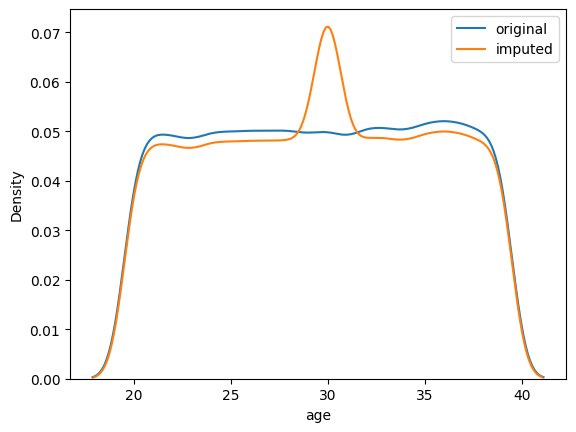

In [ ]:
sns.kdeplot(X_train['age'],label='original')
sns.kdeplot(X_train['age'].fillna(age_median),label='imputed')
plt.legend()

In [ ]:
# Observations
'''
1. Changed the distribution of the age column
2. Use advanced imputation techniques like KnN imputer

'''

'\n1. Changed the distribution of the age column\n2. Use advanced imputation techniques like KnN imputer\n\n'

Ratings


In [ ]:
X_train['ratings'].describe()

,ratings
count,34891.000000
mean,4.635058
std,0.314049
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,5.000000


In [ ]:
X_train['ratings'].isna().sum()

np.int64(1510)

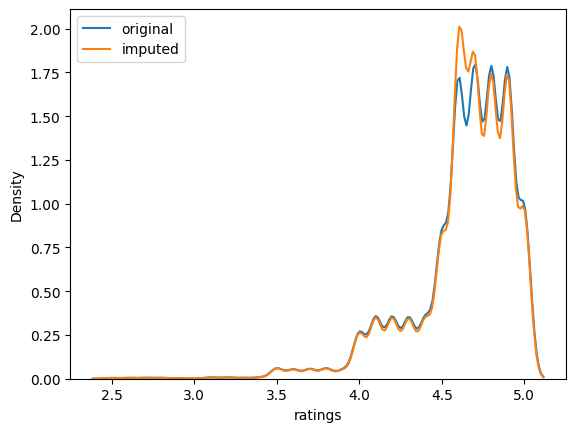

In [ ]:
ratings_mean = X_train['ratings'].mean()
sns.kdeplot(X_train['ratings'],label = 'original')
sns.kdeplot(X_train['ratings'].fillna(ratings_mean),label='imputed')
plt.legend()

Weather


In [ ]:
X_train['weather'].value_counts()

,count
weather,
Fog,6160
Stormy,6051
Cloudy,6033
Sandstorms,5958
Windy,5928
Sunny,5850


In [ ]:
X_train['weather'].isna().sum()

np.int64(421)

<Axes: xlabel='count', ylabel='weather'>

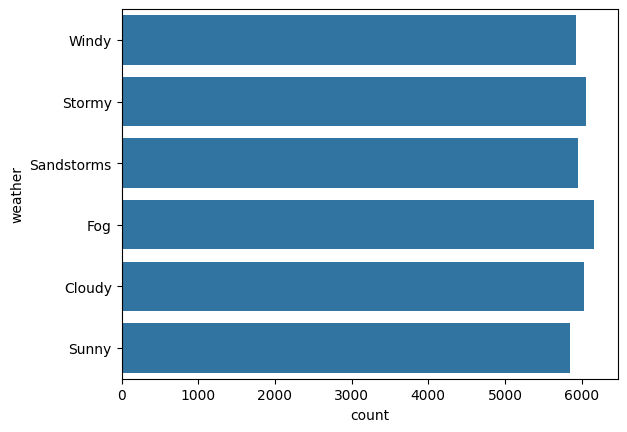

In [ ]:
sns.countplot(X_train['weather'])

In [ ]:
# No dominant category to impute from

In [ ]:
# capture the missingness
missing_weather = MissingIndicator()
missing_weather.set_output(transform="pandas")

pd.concat([X_train[['weather']], missing_weather.fit_transform(X_train[['weather']])], axis=1).sample(50)


,weather,missingindicator_weather
35514,Stormy,False
16958,Sandstorms,False
30742,Cloudy,False
24041,Stormy,False
2137,Windy,False
3701,Fog,False
44802,Sunny,False
3118,Windy,False
20047,Fog,False
19276,Sandstorms,False


Traffic

In [ ]:
X_train['traffic'].value_counts()

,count
traffic,
low,12323
jam,11320
medium,8773
high,3578


In [ ]:
X_train['traffic'].isna().sum()

np.int64(407)

<Axes: xlabel='count', ylabel='traffic'>

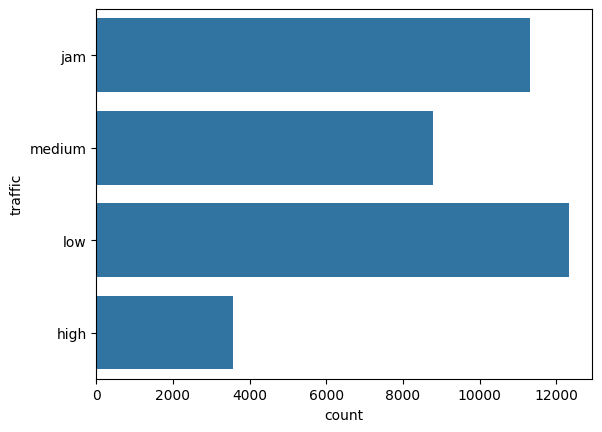

In [ ]:
sns.countplot(X_train['traffic'])

In [ ]:
# No dominating categories

Multiple Deliveries

<Axes: xlabel='count', ylabel='multiple_deliveries'>

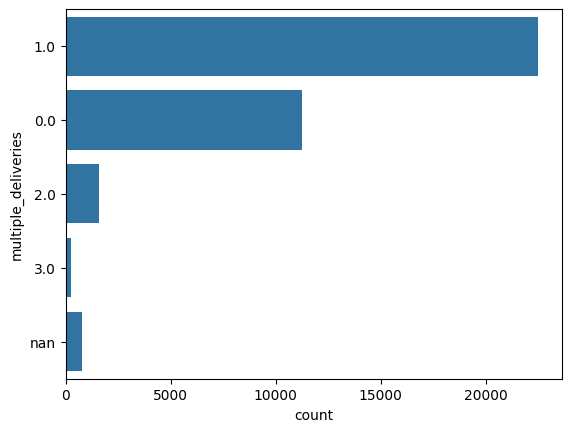

In [ ]:
sns.countplot(X_train['multiple_deliveries'].apply(str))

In [ ]:
X_train['multiple_deliveries'].isna().sum()

np.int64(795)

In [ ]:
X_train['multiple_deliveries'] = X_train['multiple_deliveries'].fillna(X_train['multiple_deliveries'].mode().apply(str))

/tmp/ipython-input-73-1900514121.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['multiple_deliveries'] = X_train['multiple_deliveries'].fillna(X_train['multiple_deliveries'].mode().apply(str))


<Axes: xlabel='count', ylabel='multiple_deliveries'>

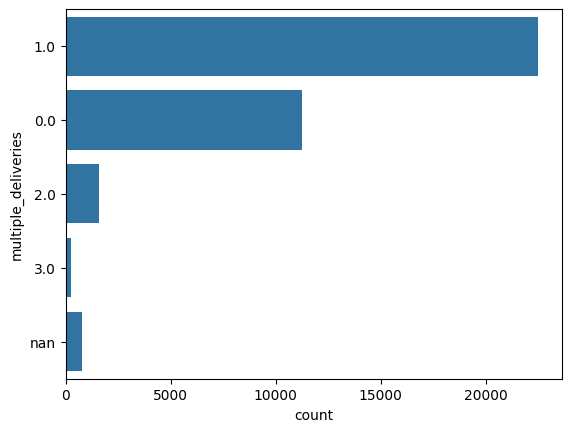

In [ ]:
sns.countplot(X_train['multiple_deliveries'].apply(str))

Festival


In [ ]:
X_train['festival'].value_counts()

,count
festival,
No,35474
Yes,739


In [ ]:
X_train['festival'] = X_train['festival'].fillna(X_train['festival'].mode()[0])

In [ ]:
X_train['festival'].isna().sum()

np.int64(0)

City Type


In [ ]:
X_train['city_type'].value_counts()

,count
city_type,
metropolitian,27245
urban,8058
semi-urban,130


In [ ]:
X_train['city_type'].isna().sum()

np.int64(968)

In [ ]:
X_train['city_type'] = X_train['city_type'].fillna(X_train['city_type'].mode()[0])

Pickup time


In [ ]:
X_train['pickup_time'].describe()

,pickup_time
count,35103.000000
mean,9.998718
std,4.082279
min,5.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,15.000000


In [ ]:
X_train['pickup_time'].isna().sum()

np.int64(1298)

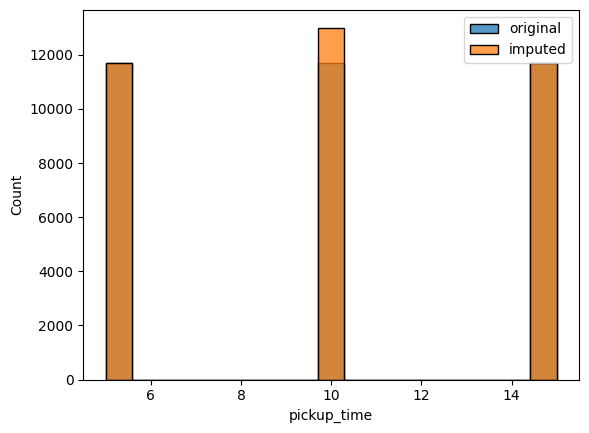

In [ ]:
sns.histplot(X_train['pickup_time'],label='original')
sns.histplot(X_train['pickup_time'].fillna(X_train['pickup_time'].median()),label='imputed')
plt.legend()

Distance

In [ ]:
X_train['distance'].describe()

,distance
count,33151.000000
mean,9.738178
std,5.608064
min,1.465067
25%,4.657672
50%,9.193470
75%,13.681057
max,20.969489


In [ ]:
X_train['distance'].isna().sum()

np.int64(3250)

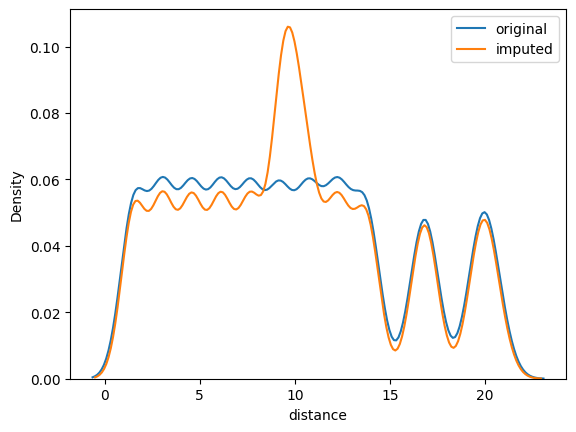

In [ ]:
sns.kdeplot(X_train['distance'],label='original')
sns.kdeplot(X_train['distance'].fillna(X_train['distance'].mean()),label='imputed')
plt.legend()

Imputation Pipeline

In [ ]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day',
 'is_weekend',
 'order_time_of_day']

In [ ]:
X_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,0
city_type,0


In [ ]:
# features to fill with mode
features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]
features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'city_name',
 'order_month',
 'order_day',
 'is_weekend',
 'order_time_of_day']

In [ ]:
# simple imputer to fill categorical vars with mode
simple_imputer = ColumnTransformer(transformers=[('mode_imputer',SimpleImputer(strategy='most_frequent'),features_to_fill_mode),
                                                 ('missing_imputer',SimpleImputer(strategy='constant',fill_value='missing'),features_to_fill_missing)],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)
simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'city_name', 'order_month', 'order_day',
                                  'is_weekend', 'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [ ]:
simple_imputer.fit_transform(X_train)

,multiple_deliveries,festival,city_type,weather,type_of_order,type_of_vehicle,city_name,order_month,order_day,is_weekend,order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time,distance,distance_type
11029,1.0,No,metropolitian,Windy,snack,electric_scooter,MUM,3,Wednesday,0,Evening,26.0,4.7,jam,2,10.0,9.177684,medium
15665,1.0,No,metropolitian,Windy,drinks,motorcycle,SUR,3,Thursday,0,Afternoon,21.0,4.9,medium,2,5.0,6.081536,medium
14475,1.0,No,metropolitian,Stormy,meal,scooter,MYS,3,Saturday,1,Night,NaN,NaN,low,2,NaN,1.554563,short
29199,1.0,No,metropolitian,Windy,buffet,motorcycle,JAP,4,Monday,0,Evening,32.0,4.7,medium,0,15.0,20.852271,very_long
22514,0.0,No,urban,Sandstorms,meal,scooter,RANCHI,3,Wednesday,0,Night,34.0,4.9,jam,1,5.0,9.056096,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,No,metropolitian,Sandstorms,meal,scooter,COIMB,4,Monday,0,Evening,29.0,4.7,jam,2,5.0,12.464367,long
44732,0.0,No,urban,Cloudy,buffet,motorcycle,SUR,3,Wednesday,0,Morning,36.0,4.8,low,0,10.0,1.520432,short
38158,0.0,No,metropolitian,Fog,buffet,scooter,BHP,2,Thursday,0,Evening,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,No,metropolitian,Windy,meal,scooter,CHEN,3,Saturday,1,Evening,25.0,4.9,medium,2,5.0,7.760938,medium


In [ ]:
simple_imputer.fit_transform(X_train).isna().sum()

,0
multiple_deliveries,0
festival,0
city_type,0
weather,0
type_of_order,0
type_of_vehicle,0
city_name,0
order_month,0
order_day,0
is_weekend,0


In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
# do basic preprocessing
num_cols = ["age", "ratings", "pickup_time", "distance"]

nominal_cat_cols = [
    "weather", "type_of_order", "type_of_vehicle", "festival",
    "city_type", "city_name", "order_month", "order_day",
    "is_weekend", "order_time_of_day"
]

ordinal_cat_cols = ["traffic", "distance_type"]


In [ ]:
# generate order for ordinal encoding
traffic_order = ["low", "medium", "high", "jam"]
distance_type_order = ["short", "medium", "long", "very_long"]


In [ ]:
# build a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('scale',MinMaxScaler(),num_cols),
    # ("scale", MinMaxScaler(), num_cols),

    ("nominal_encode", OneHotEncoder(
        drop="first",
        handle_unknown="ignore",
        sparse_output=False
    ), nominal_cat_cols),

    ("ordinal_encode", OrdinalEncoder(
        categories=[traffic_order, distance_type_order],
        encoded_missing_value=-999,
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ), ordinal_cat_cols)
], remainder="passthrough", n_jobs=-1, force_int_remainder_cols=False, verbose_feature_names_out=False)

preprocessor


ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [ ]:
preprocessor.fit_transform(X_train).isna().sum().loc[lambda ser: ser.ge(1)]



,0
age,1470
ratings,1510
pickup_time,1298
distance,3250
multiple_deliveries,795


In [ ]:
# build the pipeline
from sklearn.pipeline import Pipeline

processing_pipeline = Pipeline(steps=[
    ("simple_imputer", simple_imputer),
    ("preprocess", preprocessor),
    ("knn_imputer", knn_imputer)
])

processing_pipeline


Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehi...
                                                   'city_name', 'order_month',
                                                   'order_day', 'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [ ]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'city_name', 'order_day', 'order_month', 'is_weekend',
       'pickup_time', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [ ]:
X_train

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_day,order_month,is_weekend,pickup_time,order_time_of_day,distance,distance_type
11029,26.0,4.7,Windy,jam,2,snack,electric_scooter,1.0,No,metropolitian,MUM,Wednesday,3,0,10.0,Evening,9.177684,medium
15665,21.0,4.9,Windy,medium,2,drinks,motorcycle,1.0,No,metropolitian,SUR,Thursday,3,0,5.0,Afternoon,6.081536,medium
14475,NaN,NaN,Stormy,low,2,meal,scooter,1.0,No,metropolitian,MYS,Saturday,3,1,NaN,Night,1.554563,short
29199,32.0,4.7,Windy,medium,0,buffet,motorcycle,1.0,No,metropolitian,JAP,Monday,4,0,15.0,Evening,20.852271,very_long
22514,34.0,4.9,Sandstorms,jam,1,meal,scooter,0.0,No,urban,RANCHI,Wednesday,3,0,5.0,Night,9.056096,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,29.0,4.7,Sandstorms,jam,2,meal,scooter,0.0,No,metropolitian,COIMB,Monday,4,0,5.0,Evening,12.464367,long
44732,36.0,4.8,Cloudy,low,0,buffet,motorcycle,0.0,No,urban,SUR,Wednesday,3,0,10.0,Morning,1.520432,short
38158,36.0,4.4,Fog,jam,1,buffet,scooter,0.0,No,metropolitian,BHP,Thursday,2,0,10.0,Evening,NaN,NaN
860,25.0,4.9,Windy,medium,2,meal,scooter,1.0,No,metropolitian,CHEN,Saturday,3,1,5.0,Evening,7.760938,medium


In [ ]:
processing_pipeline.fit_transform(X_train)

,age,ratings,pickup_time,distance,weather_Fog,weather_Sandstorms,weather_Stormy,weather_Sunny,weather_Windy,weather_missing,...,order_day_Tuesday,order_day_Wednesday,is_weekend_1,order_time_of_day_Evening,order_time_of_day_Morning,order_time_of_day_Night,traffic,distance_type,multiple_deliveries,vehicle_condition
11029,0.315789,0.880,0.5,0.395429,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,2.0
15665,0.052632,0.960,0.0,0.236688,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
14475,0.578947,0.936,0.5,0.004588,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
29199,0.631579,0.880,1.0,0.993990,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0
22514,0.736842,0.960,0.0,0.389195,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.880,0.0,0.563939,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,2.0
44732,0.842105,0.920,0.5,0.002839,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,0.842105,0.760,0.5,0.189351,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,-1.0,0.0,1.0
860,0.263158,0.960,0.0,0.322792,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_pipe = Pipeline(steps=[

                             ('preprocessing',processing_pipeline),
                             ('model',lr)
])
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [ ]:
model_pipe.fit(X_train,y_train_pt)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

# get the actual predictions values
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")

print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")


The train error is 4.84 minutes
The test error is 4.87 minutes
The train r2 score is 0.58
The test r2 score is 0.57


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

model_pipe = Pipeline(steps=[
    ("preprocessing", processing_pipeline),
    ("model", rf)
])

model_pipe


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [ ]:
model_pipe.fit(X_train,y_train_pt.values.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

# get the actual predictions values
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")

print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")


The train error is 1.22 minutes
The test error is 3.30 minutes
The train r2 score is 0.97
The test r2 score is 0.80
